In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [2]:
df = pd.read_csv('train_strokes.csv')
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

This dataset contains 11 columns and 43400 records that we will use to investigate on our research. it has 3 main datatypes float, int and object.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
pd.value_counts(df['stroke'])

0    42617
1      783
Name: stroke, dtype: int64

- As we can see the number of patients with stroke is remarkable small compare to the dataset 783/43400

- Also check the dataset to see if it has any missing value with df.head(). As we can see it does, so we will need to deal with the missing value(NaN):

In [5]:
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


Bmi column contains 1462 values which is null, and that seems really small compares to the whole dataset of 43400 records. For smorking_status it is another story when 30% of its values is null. We will need to do some preprocessing for these 2 columns, there are few options:
- delete NaN values
- replace NaN values
- leave as is


In [6]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Now let see how many patients with null bmi values that have stroke:

In [7]:
df.loc[(df['bmi'].isnull()) & (df['stroke']==1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
407,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
747,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,NaN,1
1139,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,NaN,1
1613,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
42530,43103,Male,66.0,0,0,Yes,Self-employed,Urban,182.89,NaN,never smoked,1
42839,47453,Female,67.0,1,0,Yes,Govt_job,Urban,234.43,NaN,never smoked,1
43007,20773,Female,69.0,0,1,Yes,Self-employed,Rural,89.19,NaN,smokes,1
43100,58018,Male,67.0,0,0,Yes,Self-employed,Urban,136.79,NaN,smokes,1


140/783 records of patients that have stroke is not a small number so we will need to replace NaN values instead of delete or leave it as is. 
https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

C:\Users\nghie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

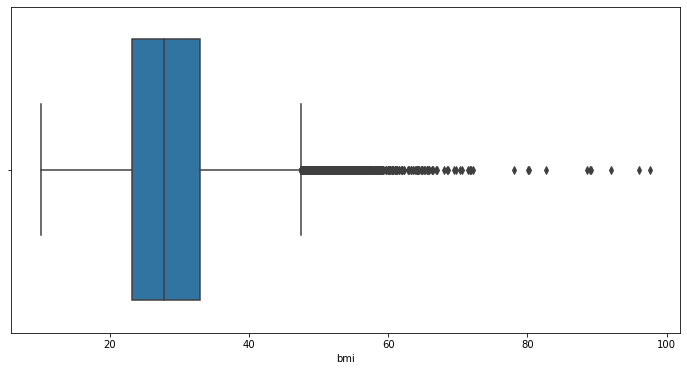

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(df['bmi'])

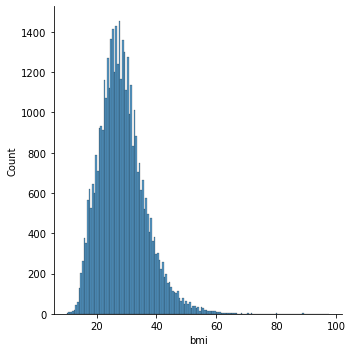

In [39]:
sns.displot(df['bmi'])

In [24]:
df.loc[df['bmi'].isnull()].replace(np.nan, df['bmi'].mean())
df['bmi'].round()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


Data cleansing: we can not use every column in this dataset so I need to find what features are relating to each others before I can do analyze by running correlation coefficient


In [8]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018839,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.018839,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


And then using data preprocess technique => data reduction: 

- remove id column since it's not a relevent information.

In [9]:
df.drop(columns=['id'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [10]:
df['bmi'].isnull().sum()

1462

# Correlation Analysis

- I use Pearson Correlation Coefficient as main method to caculate correlation values. I am not using Spearman or Kendall methods because
- Will need to convert other features with str/obj value to int
- non-number features will auto excluded from calculation

In [11]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.012760,0.006571,0.009234,0.024634,0.018839,0.002976
age,0.012760,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.006571,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.009234,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.024634,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.018839,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.002976,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


In [12]:
import seaborn as sns

In [13]:
# get correlation matrix using corr() method of Pandas framework
corr_matrix = df.corr()

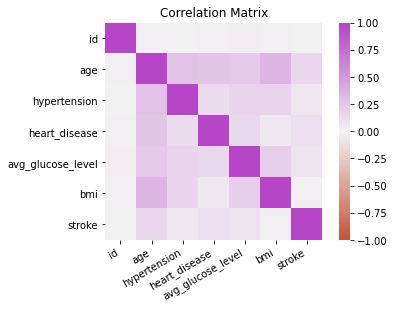

In [14]:
# 
axis = sns.heatmap(
    corr_matrix,
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sns.diverging_palette(20, 300, n=200),
    square = True
)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)
axis.set_title('Correlation Matrix');

- since value of r in correlation data is in range of (-1,1) therefore we have to set these argument
    vmin = -1,
    vmax = 1,
    center = 0
- from this graph we can have some info of the relationship between the features of the stroke dataset:
    . ????????
    

# Individual Features Analysis